In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
os.listdir("../Scikitlearn/Kaggle Comeptition1")

['.ipynb_checkpoints',
 'categorical_cols.parquet',
 'dl-course-data',
 'encoded_cols.parquet',
 'gender_submission.csv',
 'numerical_cols.parquet',
 'Rossman.ipynb',
 'rossmann-store-sales',
 'slopes.png',
 'test.csv',
 'test_data.parquet',
 'test_target.parquet',
 'Titanic-Decision-Tree.ipynb',
 'Titanic-Logistic-regression.ipynb',
 'train (3).csv',
 'training_data.parquet',
 'train_inputs.parquet',
 'train_target.parquet',
 'Untitled.ipynb',
 'Untitled2.ipynb',
 'validation_data.parquet',
 'val_target.parquet',
 'X_test.parquet',
 'X_train.parquet',
 'X_val.parquet']

In [3]:
train = pd.read_csv("../Scikitlearn/Kaggle Comeptition1/train (3).csv")
test = pd.read_csv("../Scikitlearn/Kaggle Comeptition1/test.csv")

### Exploratory Data Analysis

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.describe()
# Mean value (32) and max value is 531 this might indicate a little bit of an outlier in the data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
train[["Sex", "Survived"]].groupby("Sex", as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


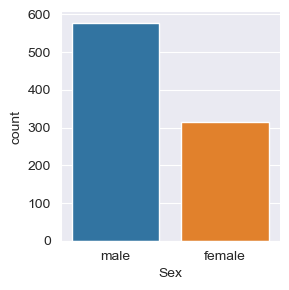

In [11]:
sns.catplot(data=train, x="Sex", kind="count", height=3)

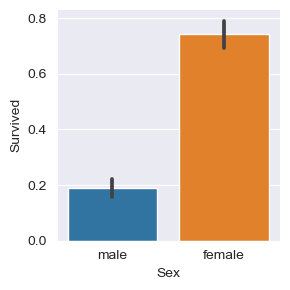

In [12]:
sns.catplot(data=train, x="Sex", y="Survived", kind="bar", height=3)

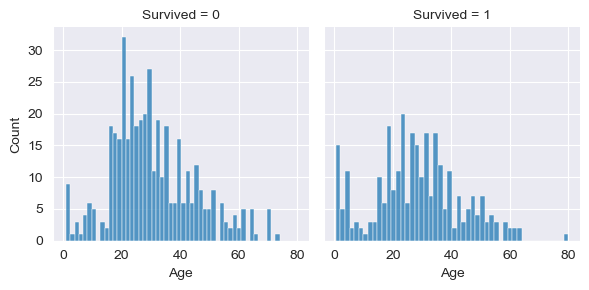

In [13]:
sns.FacetGrid(train, col="Survived").map(sns.histplot, "Age", bins=50)

<Axes: xlabel='PassengerId', ylabel='Age'>

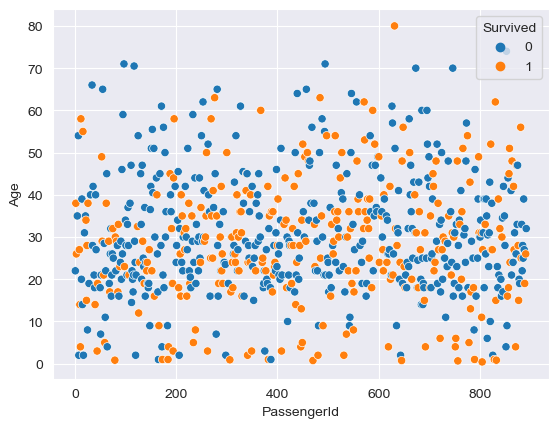

In [14]:
sns.scatterplot(train, x="PassengerId", y="Age", hue="Survived")

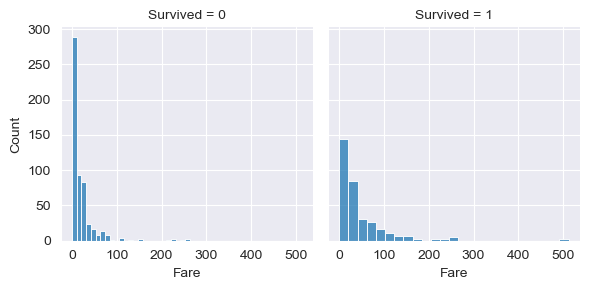

In [15]:
sns.FacetGrid(train, col="Survived").map(sns.histplot, "Fare", bins=25)

In [16]:
train[["Fare"]]

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


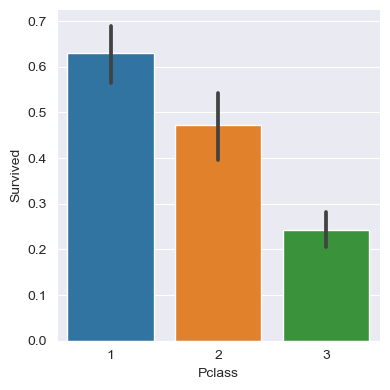

In [17]:
sns.catplot(x="Pclass", y="Survived", data=train, kind="bar", height=4)

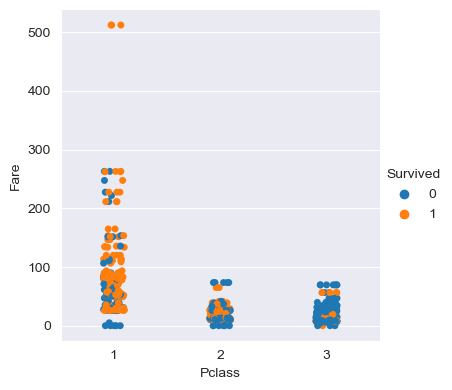

In [18]:
sns.catplot(x="Pclass", kind="strip", hue="Survived", y="Fare",  data=train, height=4)

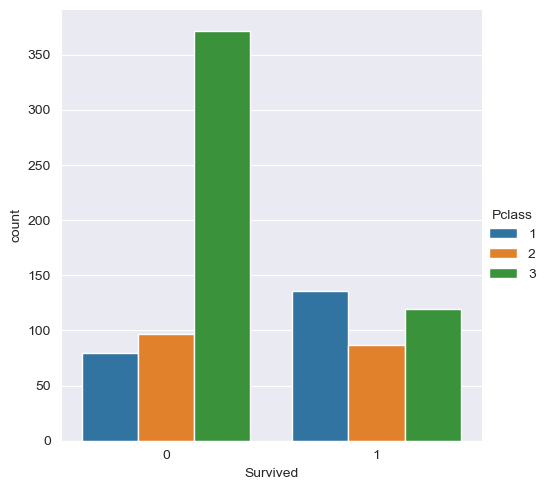

In [19]:
sns.catplot(data=train, hue="Pclass", kind="count", x="Survived")

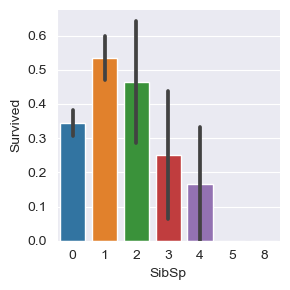

In [20]:
sns.catplot(x="SibSp", y='Survived', data=train, kind="bar", height=3)

In [21]:
train[["Parch", "Survived"]].groupby("Parch", as_index=False).agg(["mean", "count", "sum"])

Survived           
           mean count  sum
Parch                     
0      0.343658   678  233
1      0.550847   118   65
2      0.500000    80   40
3      0.600000     5    3
4      0.000000     4    0
5      0.200000     5    1
6      0.000000     1    0

In [22]:
train[["Embarked", "Survived"]].groupby("Embarked", as_index=False).agg(["mean", "count", "sum"])

Survived           
              mean count  sum
Embarked                     
C         0.553571   168   93
Q         0.389610    77   30
S         0.336957   644  217

In [23]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.highlight_between()

In [24]:
pd.crosstab([train.Embarked, train.Survived], train.Pclass, margins=True)

Pclass               1    2    3  All
Embarked Survived                    
C        0          26    8   41   75
         1          59    9   25   93
Q        0           1    1   45   47
         1           1    2   27   30
S        0          53   88  286  427
         1          74   76   67  217
All                214  184  491  889

### Feature Engineering

In [25]:
genders = {"male": 0, "female": 1}
data = [train, test]
for dataset in data:
    dataset["Sex"] = dataset["Sex"].map(genders)

In [26]:
dataset["Sex"].unique()

array([0, 1], dtype=int64)

In [27]:
embark = {"Q": 0, "S": 1, "C": 2}
for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].map(embark)

In [28]:
test.Embarked.unique()

array([0, 1, 2], dtype=int64)

In [29]:
for dataset in data:
    dataset["Fare"] = dataset["Fare"].fillna(0)
    dataset["Fare"] = dataset["Fare"].astype(int)

In [30]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
def convert_status(dataset):
    dataset["Titles"] = dataset["Name"].str.extract("([a-zA-Z]+)\.")
    dataset["Titles"] = dataset["Titles"].replace(['Rev', 'Mlle', 'Major', 'Col', 'Countess', 'Capt', 'Ms', 'Sir', 'Lady',
       'Mme', 'Don',"Dona", 'Jonkheer'], "Others")
data = [train, test]
for dataset in data:
    convert_status(dataset)

In [32]:
data_train_test = pd.concat([train.assign(ind="Train"), test.assign(ind="Test")], ignore_index=True)

In [33]:
age_nan_post = data_train_test[data_train_test["Age"].isna()].index
age_nan_post

Int64Index([   5,   17,   19,   26,   28,   29,   31,   32,   36,   42,
            ...
            1256, 1257, 1271, 1273, 1275, 1299, 1301, 1304, 1307, 1308],
           dtype='int64', length=263)

In [34]:
data_train_test.shape

(1309, 14)

In [35]:
def fill_age(dataset):
    for i in age_nan_post:
        mean_age = data_train_test["Age"][data_train_test["Titles"]==data_train_test.iloc[i]["Titles"]].mean()
        data_train_test["Age"].iloc[i] = mean_age
fill_age(train)


C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_22416\3273981119.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_test["Age"].iloc[i] = mean_age


In [36]:
train, test = data_train_test[data_train_test["ind"].eq("Train")],  data_train_test[data_train_test["ind"] == "Test"]

In [37]:
train["Age"].info()

<class 'pandas.core.series.Series'>
Int64Index: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


In [38]:
data = [train, test]
for dataset in data:
    dataset["Age"] = dataset["Age"].astype("int")
    dataset.loc[dataset["Age"] <=15] = 0
    dataset.loc[(dataset["Age"] > 15) & (dataset["Age"] <=30), "Age"] = 1
    dataset.loc[(dataset["Age"] > 30) & (dataset["Age"] <=45), "Age"] = 2    
    dataset.loc[(dataset["Age"] > 45) & (dataset["Age"] <=60), "Age"] = 3
    dataset.loc[dataset["Age"] > 60, "Age"] = 4
    

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_22416\151371645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Age"] = dataset["Age"].astype("int")


In [39]:
train.drop(labels=["Ticket", "Cabin", "ind"], axis=1, inplace=True)
test.drop(labels=["Ticket", "Cabin", "ind"], axis=1, inplace=True)

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_22416\1698691062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(labels=["Ticket", "Cabin", "ind"], axis=1, inplace=True)
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_22416\1698691062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(labels=["Ticket", "Cabin", "ind"], axis=1, inplace=True)


In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
0,1,0.0,3,"Braund, Mr. Owen Harris",0,1,1,0,7,1.0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71,2.0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,1,0,0,7,1.0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53,1.0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,2,0,0,8,1.0,Mr


C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_22416\2583626829.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True,  cmap="RdYlGn", linewidth=3)


<Axes: >

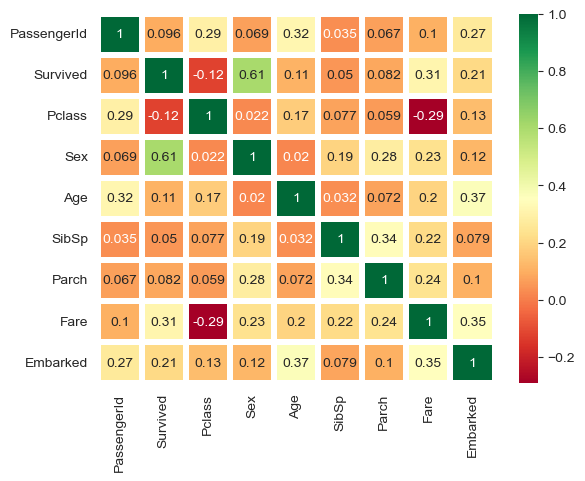

In [41]:
sns.heatmap(train.corr(), annot=True,  cmap="RdYlGn", linewidth=3)

In [47]:
%pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: mysql-connector-python in c:\anaconda3\lib\site-packages (8.4.0)



In [43]:
# import mysql.connector

In [46]:
# import mysql.connector

# mydb = mysql.connector.connect(
#   host="127.0.0.1",
#   user="root",
#   password="zaq1xsw2cde3*@1",
#   database="blogdb"
# )

# dir(mydb)


In [45]:
# import mysql.connector

# # Establish connection to the MySQL database
# mydb = mysql.connector.connect(
#     host="127.0.0.1",
#     user="root",
#     password="zaq1xsw2cde3*@1",
#     database="blogdb"
# )

# # Create a cursor object
# cursor = mydb.cursor()

# # Example SQL command to create a table
# create_table_sql = """
# CREATE TABLE IF NOT EXISTS users (
#     id INT AUTO_INCREMENT PRIMARY KEY,
#     username VARCHAR(50) NOT NULL,
#     email VARCHAR(100) NOT NULL,
#     password VARCHAR(100) NOT NULL,
#     created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP
# )
# """

# # Execute the SQL command
# cursor.execute(create_table_sql)

# # Example SQL command to insert data into the table
# insert_data_sql = """
# INSERT INTO users (username, email, password) VALUES (%s, %s, %s)
# """
# data = ("john_doe", "john@example.com", "securepassword123")

# # Execute the SQL command
# cursor.execute(insert_data_sql, data)

# # Commit the transaction
# mydb.commit()

# # Example SQL command to fetch data from the table
# select_data_sql = "SELECT * FROM users"

# # Execute the SQL command
# cursor.execute(select_data_sql)

# # Fetch all results
# results = cursor.fetchall()

# # Print the results
# for row in results:
#     print(row)

# # Close the cursor and connection
# cursor.close()
# mydb.close()


(1, 'john_doe', 'john@example.com', 'securepassword123', datetime.datetime(2024, 5, 26, 2, 56, 7))
(2, 'john_doe', 'john@example.com', 'securepassword123', datetime.datetime(2024, 5, 30, 14, 26, 28))


### Feature Creation

In [50]:
data = [train, test]
for dataset in data:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_22416\4209793643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_22416\4209793643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1


In [52]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,FamilySize
886,887,0.0,2,"Montvila, Rev. Juozas",0,1,0,0,13,1.0,Others,1
887,888,1.0,1,"Graham, Miss. Margaret Edith",1,1,0,0,30,1.0,Miss,1
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1,1,2,23,1.0,Miss,4
889,890,1.0,1,"Behr, Mr. Karl Howell",0,1,0,0,30,2.0,Mr,1
890,891,0.0,3,"Dooley, Mr. Patrick",0,2,0,0,7,0.0,Mr,1


In [56]:
train[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=False).agg(["mean", "sum", "count"])

Survived             
                mean    sum count
FamilySize                       
1           0.257282  159.0   618
2           0.527027   78.0   148
3           0.473684   36.0    76
4           0.588235   10.0    17
5           0.300000    3.0    10
6           0.300000    3.0    10
7           0.500000    2.0     4
8           0.000000    0.0     2
11          0.000000    0.0     6

In [59]:
data = [train, test]
for dataset in data:
    dataset["Age*Fare"] = dataset["Age"] * dataset["Fare"]

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_22416\3816896146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Age*Fare"] = dataset["Age"] * dataset["Fare"]
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_22416\3816896146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Age*Fare"] = dataset["Age"] * dataset["Fare"]


In [63]:
data = [train, test]
for dataset in data:
    dataset["Fare"] = pd.qcut(dataset["Fare"], 13, labels=np.arange(13))

ValueError: Bin edges must be unique: array([  0.,   0.,   7.,   7.,   7.,   8.,   9.,  13.,  16.,  26.,  30.,
        53.,  80., 512.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [64]:
pd.qcut(range(5), 4)

[(-0.001, 1.0], (-0.001, 1.0], (1.0, 2.0], (2.0, 3.0], (3.0, 4.0]]
Categories (4, interval[float64, right]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0]]

In [74]:

df = pd.DataFrame({"col1": [1,2,3,4], "col2":[5,6,7,8]})
pd.cut(df["col1"], bins=1)

0    (0.997, 4.0]
1    (0.997, 4.0]
2    (0.997, 4.0]
3    (0.997, 4.0]
Name: col1, dtype: category
Categories (1, interval[float64, right]): [(0.997, 4.0]]